## Интеллектуальный анализ данных – весна 2025
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать с усеченным датасетом `Palmer Penguins`, содержащим информацию о характеристиках трех видов пингвинов: `Adelie`, `Chinstrap` и `Gentoo`:



*   Species — вид пингвина (целевая переменная).
*   Island — остров, на котором была сделана запись.
*   Clutch Completion — завершенность кладки яиц.
*   Date Egg — закодированная дата откладки яиц (число дней от самой ранней даты в данных).
*   Culmen Length (mm) — длина клюва.
*   Culmen Depth (mm) — глубина клюва.
*   Flipper Length (mm) — длина ласт.
*   Body Mass (g) — масса тела в граммах.
*   Sex — пол особи.
*   Delta 15 N (o/oo) и Delta 13 C (o/oo) — изотопные значения, характеризующие пищевые предпочтения.

Описание полного набора данных и дополнительную информацию о проекте можно найти [здесь](https://allisonhorst.github.io/palmerpenguins/index.html) и [здесь](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download).

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('penguins_data.csv')
data.head(10)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
5,Gentoo,Biscoe,Yes,22,48.1,15.1,209.0,5500.0,MALE,8.45738,-26.22664
6,Gentoo,Biscoe,Yes,13,51.1,16.5,225.0,5250.0,MALE,8.20660,-26.36863
7,Gentoo,Biscoe,No,392,42.7,13.7,208.0,3950.0,FEMALE,8.14567,-26.59467
8,Adelie,Biscoe,Yes,14,39.6,20.7,191.0,3900.0,FEMALE,8.80967,-26.78958
9,Gentoo,Biscoe,Yes,735,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные признаки? Если да, то закодируйте их самым оптимальным способом. Аргументируйте свой выбор.

In [3]:
data.isnull().sum()

,0
Species,0
Island,0
Clutch Completion,0
Date Egg,0
Culmen Length (mm),2
Culmen Depth (mm),2
Flipper Length (mm),2
Body Mass (g),2
Sex,10
Delta 15 N (o/oo),14


*Да, в наборе есть пропущенные значения*

In [4]:
data_1 = data.dropna()
data_1 = pd.get_dummies(data_1)
data_1

,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Species_Adelie,Species_Chinstrap,Species_Gentoo,Island_Biscoe,Island_Dream,Island_Torgersen,Clutch Completion_No,Clutch Completion_Yes,Sex_.,Sex_FEMALE,Sex_MALE
0,382,50.9,19.1,196.0,3550.0,10.02372,-24.86594,False,True,False,False,True,False,False,True,False,False,True
1,741,45.2,17.8,198.0,3950.0,8.88942,-24.49433,False,True,False,False,True,False,False,True,False,True,False
2,744,46.5,13.5,210.0,4550.0,7.99530,-25.32829,False,False,True,True,False,False,False,True,False,True,False
3,10,45.2,16.6,191.0,3250.0,9.62357,-24.78984,False,True,False,False,True,False,False,True,False,True,False
4,13,48.4,14.4,203.0,4625.0,8.16582,-26.13971,False,False,True,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,382,47.6,18.3,195.0,3850.0,8.83502,-24.65859,False,True,False,False,True,False,False,True,False,True,False
340,382,39.7,18.4,190.0,3900.0,9.29808,-25.23453,True,False,False,False,False,True,False,True,False,False,True
341,16,38.6,17.2,199.0,3750.0,8.77322,-26.48973,True,False,False,True,False,False,False,True,False,True,False
342,392,46.6,14.2,210.0,4850.0,8.38289,-26.86352,False,False,True,True,False,False,False,True,False,True,False


*Для кодирования категориальных признаков я использовала One-Hot кодирование, поскольку признаки нельзя ранжировать, складывать и тд:*

Целевую категориальную переменную закодируйте в ординальном порядке: Chinstrap = 0, Gentoo = 1, Adelie = 2. Можно воспользоваться [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

Теперь сохраним информацию о признаках в переменную
`X`, а о целевой переменной – в переменную `y`.

In [5]:
from sklearn.preprocessing import OrdinalEncoder
data_3 = data
data_3 = data.dropna()
data_3['Species_code'] = OrdinalEncoder(categories=[['Chinstrap', 'Gentoo', 'Adelie']]).fit_transform(data_3[['Species']])
data_3.drop('Species', axis=1, inplace=True)
data_3 = pd.get_dummies(data_3)
X = data_3.drop('Species_code', axis=1)
y = data_3['Species_code']

<ipython-input-5-99b4f1192596>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3['Species_code'] = OrdinalEncoder(categories=[['Chinstrap', 'Gentoo', 'Adelie']]).fit_transform(data_3[['Species']])
<ipython-input-5-99b4f1192596>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3.drop('Species', axis=1, inplace=True)


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
np.random.seed()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

Стратификация(параметр stratify) помогает в случае, если есть дисбаланс в классах: представтелей какого-то больше. Stratify сохраняет относительную частоту каждого класса в выборках.
Источник: https://scikit-learn.org/stable/modules/cross_validation.html#stratification

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака:  `Flipper Length (mm)` и `Body Mass (g)`  – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_m = sc.fit_transform(X_train[['Flipper Length (mm)', 'Body Mass (g)']])
X_test_m = sc.fit_transform(X_test[['Flipper Length (mm)', 'Body Mass (g)']])

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf_1 = KNeighborsClassifier(n_neighbors=1)
clf_2 = KNeighborsClassifier(n_neighbors=3)
clf_3 = KNeighborsClassifier(n_neighbors=5)
clf_4 = KNeighborsClassifier(n_neighbors=10)
clf_5 = KNeighborsClassifier(n_neighbors=15)
clf_6 = KNeighborsClassifier(n_neighbors=25)
s = [clf_1, clf_2, clf_3, clf_4, clf_5, clf_6]
for c in s:
  c.fit(X_train_m, y_train)

k = [1, 3, 5, 10, 15, 25]
tr_acc = []
t_acc = []
for c in s:
  y_p_tr = c.predict(X_train_m)
  tr_acc.append(accuracy_score(y_train, y_p_tr))
  y_p_t = c.predict(X_test_m)
  t_acc.append(accuracy_score(y_test, y_p_t))
for i in range(6):
  print(f"При k = {k[i]} accuracy на train = {tr_acc[i]}, a на test = {t_acc[i]}")

При k = 1 accuracy на train = 0.9911894273127754, a на test = 0.7040816326530612
При k = 3 accuracy на train = 0.8634361233480177, a на test = 0.8163265306122449
При k = 5 accuracy на train = 0.8105726872246696, a на test = 0.8061224489795918
При k = 10 accuracy на train = 0.8193832599118943, a на test = 0.8061224489795918
При k = 15 accuracy на train = 0.801762114537445, a на test = 0.8061224489795918
При k = 25 accuracy на train = 0.8061674008810573, a на test = 0.826530612244898


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [10]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

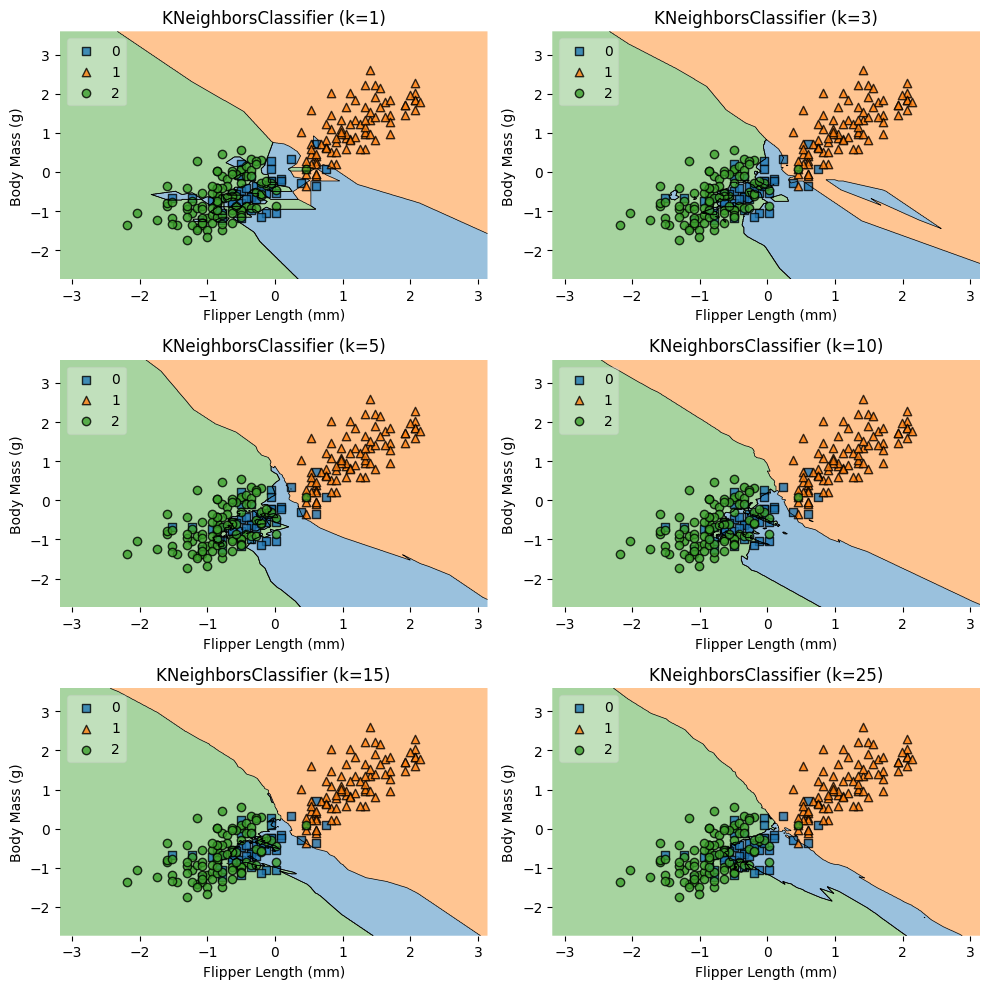

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(3, 2)

fig = plt.figure(figsize=(10,10))

labels = ['KNeighborsClassifier (k=1)', 'KNeighborsClassifier (k=3)', 'KNeighborsClassifier (k=5)', 'KNeighborsClassifier (k=10)', 'KNeighborsClassifier (k=15)', 'KNeighborsClassifier (k=25)']
for clf, lab, grd in zip(s,
                         labels,
                         itertools.product(range(3), range(2))):
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_decision_regions(X=X_train_m, y=y_train.values.astype(np.int_), clf=clf, legend=2, ax=ax)
    plt.title(lab)
    plt.xlabel('Flipper Length (mm)')
    plt.ylabel('Body Mass (g)')

plt.tight_layout()
plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

Как мы можем заметить, accuracy на test при k=3, k=10, k=25 примерно равны, однако именно при k=10 accuracy-test ближе всего к accuracy train, т.е. модель на обучающей выборке и на тестовой показывает один и тот же результат.
Касательно изображений: можно заметить, что более ровные линии появляются с k=5, а при k=25 идет слишком явное обобщение, т.е. границы прямые

### Задание 2. KNN своими руками. 2,5 балла

**Задача 2.1 (2 балла)** В данном задании мы попробуем реализовать алгоритм KNN своими руками, делать мы будем KNN именно для классификации.

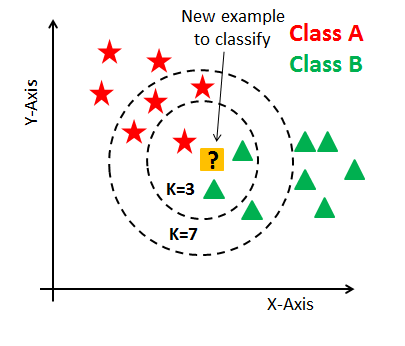

Рекомендации по реализации:
- Используйте `numpy` для представления данных в виде массивов, чтобы минимизировать преобразования.
- Избегайте циклов по всем объектам, по возможности используйте векторизированные операции.
- Обратите внимание на методы [np.linalg.norm()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) и [np.argsort()](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html), а также на класс `collections.Counter`.
- Особый плюс, если учтёте обработку возможных ошибок.

In [33]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
      self.X_train_knn = np.array(X)
      self.y_train_knn = np.array(y)

    def predict(self, X):
      X_pred_knn = np.array(X)
      #дальше не знаю, надеюсь хоть чуть чуть накините баллов за fit и count_distance



    def count_distance(self, x, y):
      p = np.linalg.norm(x - y)
      return p

In [34]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

**Задача 2.2 (0.5 балла)** Протестируйте ваш алгоритм на данных о пингвинах. Выведите лучший получившийся результат на тестовой выборке.

KeyboardInterrupt: 

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [12]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [13]:
data.isnull().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


Пропущенных значений нет

In [14]:
data = data.drop(['Unnamed: 0'], axis=1) #удаление быссмысленного столбца

**Задача 3.2 (0.2 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Постройте матрицу корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки имеют наибольшую корреляцию с целевой переменной?

In [15]:
data.corr(numeric_only = True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Наибольшую корреляцию с целевой переменной(Price) имеют вещественные признаки carat и x

**Задача 3.3 (0.2 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные признаки методом OneHot-кодирования (`pd.get_dummies()` или `OneHotEncoder` из `sklearn`).

In [16]:
data_3 = pd.get_dummies(data)

**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [17]:
X = data_3.drop('price', axis=1)
y = data_3['price']
np.random.seed()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче стандартизируйте вещественные признаки в тренировочной и тестовой выборках с помощью `StandardScaler`.

Объясните, как это повлияет на интерпретацию коэффициентов линейной регрессии.

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_m = sc.fit_transform(X_train)
X_test_m = sc.fit_transform(X_test)

После применения масштабирования при увеличении X1 На 1 y увеличится не на w1, а на w1 стандартное отклонение

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train_m, y_train)
y_tr_pr = lr.predict(X_train_m)
print(f"MSE на train = {mean_squared_error(y_train, y_tr_pr)}")
y_t_pr = lr.predict(X_test_m)
print(f"MSE на test = {mean_squared_error(y_test, y_t_pr)}")



MSE на train = 1282537.5348534924
MSE на test = 1267059.0233133016


**Задача 3.7 (0.3 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [20]:
print(lr.coef_)

[ 5.31238748e+03 -9.26288822e+01 -6.24417854e+01 -1.10165467e+03
  1.23642135e+01 -3.17076202e+01 -1.21534108e+02 -3.96016726e+01
  5.03081999e+01  1.57706485e+01  1.63329097e+00  2.07183034e+02
  1.68832323e+02  1.39797165e+02  5.54424658e+01 -1.28814052e+02
 -2.53321239e+02 -3.89001528e+02 -4.80845908e+02  2.36561887e+02
 -1.46389320e+02 -4.89987212e+02  2.06455369e+02  1.05130589e+02
  2.52220196e+02  2.75802641e+02]


Оценки коэффициентов переменных carat и x больше остальных по модулю на порядок.

**Задача 3.8 (0.5 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, установив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [21]:
from sklearn import linear_model

In [22]:
lr_2 = linear_model.Lasso()
lr_2.fit(X_train_m, y_train)
print(lr_2.coef_)

lr_3 = linear_model.Ridge()
lr_3.fit(X_train_m, y_train)
print(lr_3.coef_)

[ 5265.95813651   -89.59651474   -61.0794223  -1045.82448756
    -0.           -31.05406939  -127.2085774    -48.85322752
    33.73127456     0.           -11.58347564   160.66528256
   115.10421551    86.32047731    -0.          -177.00932761
  -292.85981604  -417.66816744  -509.00745876   190.82430983
  -254.36599524  -583.76883928   114.93512481    -0.
   189.2425409    201.81078765]
[ 5.30857195e+03 -9.23663163e+01 -6.24088763e+01 -1.09723025e+03
  1.20584222e+01 -3.21238537e+01 -1.21552925e+02 -3.96099118e+01
  5.03087317e+01  1.57686755e+01  1.64811065e+00  2.07157863e+02
  1.68808502e+02  1.39752151e+02  5.54143340e+01 -1.28789905e+02
 -2.53252877e+02 -3.88926109e+02 -4.80791452e+02  2.36599666e+02
 -1.46444778e+02 -4.89972286e+02  2.06435165e+02  1.05112541e+02
  2.52268469e+02  2.75829355e+02]


Значения коэффициентов признаков carat и x почти не изменились, именно поэтому мы можем сказать, что проблема мультиколлинеарности в изначальной регрессии проявлялась слабо

**Задача 3.9 (0.5 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод сильнее снижает норму коэффициентов? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.545e+08, tolerance: 6.027e+07
  model = cd_fast.enet_coordinate_descent(


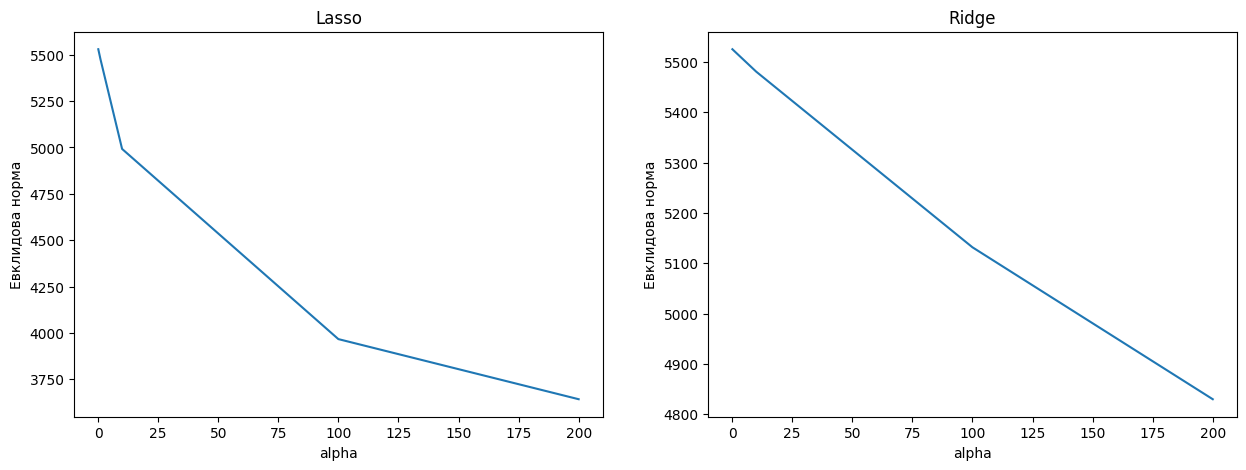

In [23]:
import matplotlib.pyplot as plt

lr_3 = linear_model.Lasso(alpha=0.1)
lr_3.fit(X_train_m, y_train)

lr_4 = linear_model.Lasso(alpha=1)
lr_4.fit(X_train_m, y_train)

lr_5 = linear_model.Lasso(alpha=10)
lr_5.fit(X_train_m, y_train)

lr_6 = linear_model.Lasso(alpha=100)
lr_6.fit(X_train_m, y_train)

lr_7 = linear_model.Lasso(alpha=200)
lr_7.fit(X_train_m, y_train)

lasso = np.array([np.linalg.norm(lr_3.coef_), np.linalg.norm(lr_4.coef_), np.linalg.norm(lr_5.coef_), np.linalg.norm(lr_6.coef_), np.linalg.norm(lr_7.coef_)])

lr_8 = linear_model.Ridge(alpha=0.1)
lr_8.fit(X_train_m, y_train)

lr_9 = linear_model.Ridge(alpha=1)
lr_9.fit(X_train_m, y_train)

lr_10 = linear_model.Ridge(alpha=10)
lr_10.fit(X_train_m, y_train)

lr_11 = linear_model.Ridge(alpha=100)
lr_11.fit(X_train_m, y_train)

lr_12 = linear_model.Ridge(alpha=200)
lr_12.fit(X_train_m, y_train)

ridge = np.array([np.linalg.norm(lr_8.coef_), np.linalg.norm(lr_9.coef_), np.linalg.norm(lr_10.coef_), np.linalg.norm(lr_11.coef_), np.linalg.norm(lr_12.coef_)])

fig, axs = plt.subplots(1, 2, figsize=(15, 5), dpi=100)

axs[0].plot([0.1, 1, 10, 100, 200], lasso)
axs[0].set_title('Lasso')
axs[0].set_xlabel('alpha')
axs[0].set_ylabel('Евклидова норма')

axs[1].plot([0.1, 1, 10, 100, 200], ridge)
axs[1].set_title('Ridge')
axs[1].set_xlabel('alpha')
axs[1].set_ylabel('Евклидова норма')
plt.show()


Lasso сильнее снижает норму коэффициентов, поскольку с каждым новым альфа(по мере увеличения) он обнуляет некоторые из них. Именно поэтому и используют Lasso - он позволяет выкинуть ненужные признаки из анализа.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [24]:
from sklearn.linear_model import LassoCV

alphas = [0.1, 1, 10, 100, 200]
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train_m, y_train)
mse = lasso_cv.mse_path_.mean(axis=1)
print(mse)

[1957267.96974785 1536533.84995698 1297014.27597873 1286687.78269726
 1287581.53620113]


Минимальное среднее значение MSE (самое высокое качество) достигается при alpha = 100

**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [25]:
lr_final = linear_model.Lasso(alpha=100)
lr_final.fit(X_train_m, y_train)
lr_final.coef_

array([3896.38101115,   -0.        ,   -0.        ,    0.        ,
          0.        ,    0.        ,  -69.47211207,   -0.        ,
         15.70537908,   -0.        ,   -0.        ,    9.97284679,
          0.        ,    0.        ,    0.        ,  -87.89196723,
       -163.76037138, -282.82714393, -394.83308637,   72.90723018,
       -205.24338712, -462.39758265,    0.        ,   -0.        ,
         70.23921842,   92.68332233])

Наиболее информативным признаком оказался carat, и это логично, ведь все мы знаем, чем больше карат, тем выше цена за брюлики. На втором месте clarity_SI2. Неинформативными оказались - depth, table, x, y, z(мб модель посчитала их избыточными, поскольку у нас уже есть признак, отвечающий за размер - carat), а также некоторые color, cut, clarity(просто не связаны с ценой, не сильно на нее влияет).

In [29]:
X_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [32]:
y_tr_final = lr_final.predict(X_test_m)
print(f"MSE на test = {mean_squared_error(y_test, y_tr_final)}")

MSE на train = 1513252.0447503976


На обычной регрессии MSE меньше, чем на Lasso, поэтому она лучше. Так могло получиться из-за того, что для определения цены важны все признаки, а лассо некоторые из них выкидывает, что и влияет на качество его работы.